In [1]:
import qnmfits
import numpy as np
import scipy
import corner
from funcs.likelihood_funcs import *
from funcs.CCE import * 
from funcs.kernel_param_funcs import *
from funcs.GP_funcs import *
from funcs.qnm_selecting_funcs import * 

In [2]:
id = "0001"
sim_main = SXS_CCE(id, lev="Lev5", radius="R2")

n_max = 1

T0 = 20
T = 100

qnm_list = [(2,2,n,1) for n in np.arange(0, n_max+1)] #+ [(3,2,0,1)]
spherical_modes = [(2, 2)]

chif_mag_0 = sim_main.chif_mag
Mf_0 = sim_main.Mf

In [ ]:
ls_fit = qnmfits.multimode_ringdown_fit(
                        sim_main.times,
                        sim_main.h,
                        modes=qnm_list,
                        Mf=Mf_0,
                        chif=chif_mag_0,
                        t0=T0,
                        T=T,
                        spherical_modes=spherical_modes,
                    )

ls_fit = qnmfits.multimode_ringdown_fit(
                        sim_main.times,
                        sim_main.h,
                        modes=qnm_list,
                        Mf=Mf_0,
                        chif=chif_mag_0,
                        t0=T0,
                        T=T,
                        spherical_modes=spherical_modes,
                        t0_method="closest"
                    )



In [3]:
print(qnm_list)

[(2, 2, 0, 1), (2, 2, 1, 1)]


In [4]:
with open('tuned_params.pkl', 'rb') as f:
    params = pickle.load(f)

tuned_param_dict_main = params[id]

In [5]:
tuned_param_dict_main[(2,2)]

{'sigma_max': 0.0010398885581223054,
 't_s': 16.99587527469582,
 'length_scale': 31.570809750720336,
 'period': 4.799097746418353,
 'sigma_min': 0.00010398885581223055,
 'sharpness': 16,
 'length_scale_2': 11.70660990033674,
 'period_2': 11.352296467475231,
 'a': 0.5}

In [6]:
fit_main = qnm_BGP_fit(
        sim_main.times,
        sim_main.h,
        qnm_list,
        Mf_0,
        chif_mag_0,
        T0,
        tuned_param_dict_main,
        kernel_main,
        t0_method="geq",
        T=T,
        spherical_modes=spherical_modes,
        include_chif=True,
        include_Mf=True,
    )

Corrected: [ 20.   20.1  20.2  20.3  20.4  20.5  20.6  20.7  20.8  20.9  21.   21.1
  21.2  21.3  21.4  21.5  21.6  21.7  21.8  21.9  22.   22.1  22.2  22.3
  22.4  22.5  22.6  22.7  22.8  22.9  23.   23.1  23.2  23.3  23.4  23.5
  23.6  23.7  23.8  23.9  24.   24.1  24.2  24.3  24.4  24.5  24.6  24.7
  24.8  24.9  25.   25.1  25.2  25.3  25.4  25.5  25.6  25.7  25.8  25.9
  26.   26.1  26.2  26.3  26.4  26.5  26.6  26.7  26.8  26.9  27.   27.1
  27.2  27.3  27.4  27.5  27.6  27.7  27.8  27.9  28.   28.1  28.2  28.3
  28.4  28.5  28.6  28.7  28.8  28.9  29.   29.1  29.2  29.3  29.4  29.5
  29.6  29.7  29.8  29.9  30.   30.1  30.2  30.3  30.4  30.5  30.6  30.7
  30.8  30.9  31.   31.1  31.2  31.3  31.4  31.5  31.6  31.7  31.8  31.9
  32.   32.1  32.2  32.3  32.4  32.5  32.6  32.7  32.8  32.9  33.   33.1
  33.2  33.3  33.4  33.5  33.6  33.7  33.8  33.9  34.   34.1  34.2  34.3
  34.4  34.5  34.6  34.7  34.8  34.9  35.   35.1  35.2  35.3  35.4  35.5
  35.6  35.7  35.8  35.9  36.   36.1  36

In [7]:
covariance_main = get_inverse(fit_main["fisher_matrix"])  

samples_main = scipy.stats.multivariate_normal(
    fit_main["mean"], covariance_main, allow_singular=True
).rvs(size=10000)

In [8]:
print(covariance_main)

[[ 1.55390660e-07  2.33074986e-09 -9.29977286e-08 -7.08967895e-08
  -5.59753633e-09  6.80403613e-08]
 [ 2.33074986e-09  1.34742145e-07  6.15811081e-08 -7.48664534e-08
  -3.47727371e-07 -2.56295627e-07]
 [-9.29977286e-08  6.15811081e-08  1.04053205e-07  7.32895505e-09
  -1.37074729e-07 -1.48986443e-07]
 [-7.08967895e-08 -7.48664534e-08  7.32895505e-09  9.12185643e-08
   2.08127942e-07  1.25510399e-07]
 [-5.59753633e-09 -3.47727371e-07 -1.37074729e-07  2.08127942e-07
   1.39550145e-06  1.03109419e-06]
 [ 6.80403613e-08 -2.56295627e-07 -1.48986443e-07  1.25510399e-07
   1.03109419e-06  8.10403548e-07]]


In [9]:
print(fit_main["mean"])

[ 0.04854371  0.17122717  0.0187368  -0.01307786  0.68734659  0.95163153]


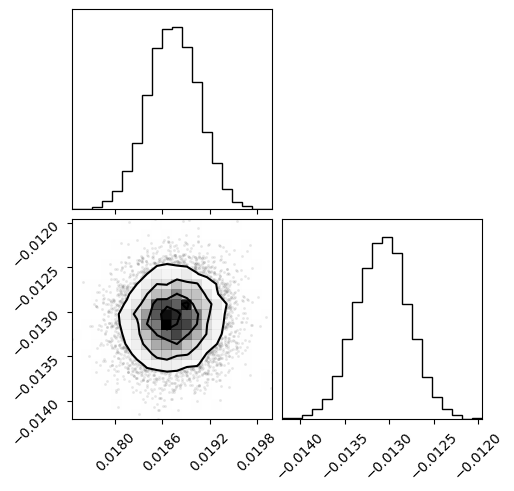

In [10]:
figure = corner.corner(
    samples_main[:,[2,3]],
    plot_contours=True,
    truths=[0,0]
)